<a href="https://colab.research.google.com/github/peartt/cse480-notebooks/blob/master/08_2_Ponder_and_Prove_Turing_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Turing Machines
## Due: Saturday, 27 February 2021, 11:59 pm

In [1]:
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *

You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)



## TODO Study Examples

In the folders

Jove/For_CS3100_Fall2020/17_DTMs_and_NDTMs

and 

Jove/For_CS3100_Fall2020/18_More_TM_Exs

you will find many examples of Deterministic Turing Machines, and Nondeterministic Turing Machines. Study these carefully!

## TODO Write a Summary

Describe what you learned about TMs of both varieties.

## TODO Create a DTM to Delete a Character

This task is to delete a character from the tape string. Deleting the current symbol means transforming the tape from $x\sigma y$ to $xy$ where $\sigma$ is any symbol, including a blank, and $y$ is a string of nonblank symbols. Assume the input alphabet is $\{a, b\}$.

HINT: Use a couple of states (labeled $q_a$ and $q_b$, say) for your TM to remember a symbol between the time it is erased and the time it is copied in the next square to the left. (The complete DTM requires about 6 states total, with 12 transitions.)


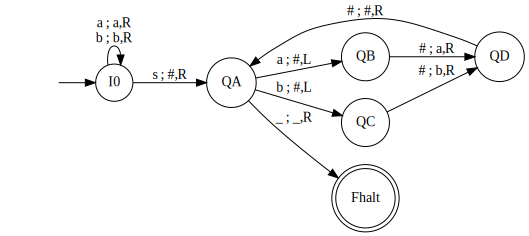

In [2]:
dotObj_tm(md2mc('''
  TM
!!cs  sr  sw   md   ns
  I0 : a ; a , R -> I0
  I0 : b ; b , R -> I0
  I0 : s ; # , R -> QA
  QA : a ; # , L -> QB
  QA : b ; # , L -> QC
  QA : _ ; _ , R -> Fhalt
  QB : # ; a , R -> QD
  QC : # ; b , R -> QD
  QD : # ; # , R -> QA
'''), FuseEdges=True)

## TODO Create a DTM to Insert a Character

This task is the opposite of the first one, namely, to insert a character into the tape string. Inserting the symbol $\sigma$ is done virtually the same way as deleting, except that the single pass goes from left to right, symbols are moved to the right instead of to the left, and the move that starts things off writes $\sigma$ instead of a blank.


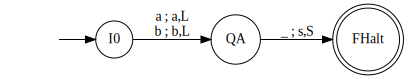

In [3]:
dotObj_tm(md2mc('''
  TM
!!cs  sr  sw   md   ns
  I0 : a ; a , L -> QA
  I0 : b ; b , L -> QA
  QA : _ ; s , S -> FHalt
'''), FuseEdges=True)

## TODO Create a DTM to Copy a String

Let $\sqcup$ represent the blank symbol. A *Copy* DTM starts with tape $\sqcup\ x$ where $x$ is a string of nonblank symbols, and ends up with $\sqcup\ x \sqcup x$. Again, assume the input alphabet is $\{a, b\}$.

HINT: This DTM requires about 10 states, and not quite double that many transitions.

The following turing machine is designed to work on the turing machine run at this website: http://morphett.info/turing/

In [4]:
dotObj_tm(md2mc('''
  TM
;cs  sr  sw   md   ns
0 _ * R 9
0 0 * * 9
0 1 * * 9

9 1 _ R 1
9 0 _ R 5
9 _ * * halt

1 1 * R 1
1 0 * R 1 ;Go until we find the the end of x
1 _ * R 2
2 1 * R 2
2 0 * R 2
2 _ 1 L 3 ;Write our symbol
3 _ * L 4
3 0 * L 3
3 1 * L 3
4 1 * L 4
4 0 * L 4 ;Loop back until we find the start
4 _ 1 R 9 ;Rewrite the symbol we duplicated and return to start state

5 1 * R 5
5 0 * R 5 ;Go until we find the the end of x
5 _ * R 6
6 0 * R 6
6 1 * R 6
6 _ 0 L 7 ;Write our symbol
7 _ * L 8
7 0 * L 7
7 1 * L 7
8 1 * L 8
8 0 * L 8 ;Loop back until we find the start
8 _ 0 R 9 ;Rewrite the symbol we duplicated and return to start state
'''), FuseEdges=True)

Syntax error at ';'  on line  3
Your are hosed due to a syntax error!


ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



ValueError: ignored

## TODO Refresh Your Knowledge of the 3x+1 Conjecture

The code on page 200 does the 3x+1 Conjecture testing recursively:

In [ ]:
def tep1(x):
    if (x==1):
        return 1
    elif (x%2 == 0):
        return tep1(x/2)
    else:
        return tep1(3*x+1)

print(tep1(3))
print(tep1(191))
print(tep1(19192949297080))
print(tep1(191929492970809272397923472398492839482))
print(tep1(191929492970809272397923472398492839482938492))

Two Python techniques --- "memoizing" and "listifying" --- make for faster code:

In [ ]:
def memoize(func):
    results = {}
    def inner(i):
        if not i in results:
            results[i] = func(i)
        return results[i]
    return inner

def listify(func):
    def inner(x):
        return list(func(x))
    return inner

@memoize
def tep1(x):
    return 1 if x == 2 else tep1(x/2) if x%2 == 0 else tep1(3*x+1)

@listify
def tepmany(x):
    for i in range(1, x+1):
        yield tep1(i)

print(max(tepmany(100000)))

# TODO Modify a NON-Trivial Turing Machine Program

The Turing machine program on page 202 performs the continuing 3x+1 transformation on an input that is a binary number. So for example if the
initial tape has

$11$

which is the binary representation of the decimal number three, the final tape
will have

$1$

on it.

Modify the program so that a trace of all intermediate results appears on the output tape, e.g.:

$11*1010*101*10000*1000*100*10*1$

which separates with a star the binary representations of the numbers in the
continuing 3x+1 transformation from 3 to 10 to 5 to 16 to 8 to 4 to 2 to 1.


The following turing machine is designed to work on the turing machine run at this website: http://morphett.info/turing/

In [ ]:
0 0 _ R 0
0 1 1 R goto_lsb
0 _ _ * error
goto_lsb 0 0 R goto_lsb
goto_lsb 1 1 R goto_lsb
goto_lsb _ # L copy_find_front

copy_find_front 0 * L copy_find_front
copy_find_front 1 * L copy_find_front
copy_find_front # * R copy
copy_find_front _ * R copy

copy 0 & R copy1
copy 1 & R copy2
copy _ * R exit_copy
copy # * R exit_copy

exit_copy 1 * R exit_copy
exit_copy 0 * R exit_copy
exit_copy # * R exit_copy
exit_copy _ * L branch  

;0 block
copy1 1 * R copy1
copy1 0 * R copy1
copy1 # * R copy_loop
copy_loop 1 * R copy_loop
copy_loop 0 * R copy_loop
copy_loop _ 0 L copy_back_0
copy_back_0 1 * L copy_back_0
copy_back_0 0 * L copy_back_0
copy_back_0 # * L copy_back_0
copy_back_0 & 0 R copy

;1 block
copy2 1 * R copy2
copy2 0 * R copy2
copy2 # * R copy2_loop
copy2_loop 1 * R copy2_loop
copy2_loop 0 * R copy2_loop
copy2_loop _ 1 L copy_back_1
copy_back_1 1 * L copy_back_1
copy_back_1 0 * L copy_back_1
copy_back_1 # * L copy_back_1
copy_back_1 & 1 R copy

branch 0 # L copy_find_front
branch 1 1 L check_n_eq_1

check_n_eq_1 0 0 R 01_fma
check_n_eq_1 1 1 R 01_fma
check_n_eq_1 _ _ R halt
check_n_eq_1 # * R clean_up

clean_up 1 _ L clean_up
clean_up 0 _ L clean_up
clean_up # _ L halt

00_fma 0 0 L 00_fma
00_fma 1 1 L 01_fma
00_fma # # R goto_lsb

01_fma _ 1 R goto_lsb
01_fma 1 0 L 10_fma
01_fma 0 1 L 00_fma
01_fma # * R 01_add_space

01_add_space 1 _ R 01_add_space_1
01_add_space 0 _ R 01_add_space_0

01_add_space_1 1 1 R 01_add_space_1
01_add_space_1 0 1 R 01_add_space_0
01_add_space_1 _ 1 * 01_go_back

01_add_space_0 1 0 R 01_add_space_1
01_add_space_0 0 0 R 01_add_space_0
01_add_space_0 _ 0 * 01_go_back

01_go_back 0 * L 01_go_back
01_go_back 1 * L 01_go_back
01_go_back _ * * 01_fma

10_fma 0 0 L 01_fma
10_fma 1 1 L 10_fma
10_fma _ 0 L 01_fma
10_fma # * R 10_add_space

10_add_space 1 _ R 10_add_space_1
10_add_space 0 _ R 10_add_space_0

10_add_space_1 1 1 R 10_add_space_1
10_add_space_1 0 1 R 10_add_space_0
10_add_space_1 _ 1 * 10_go_back

10_add_space_0 1 0 R 10_add_space_1
10_add_space_0 0 0 R 10_add_space_0
10_add_space_0 _ 0 * 10_go_back

10_go_back 0 * L 10_go_back
10_go_back 1 * L 10_go_back
10_go_back _ * * 10_fma

;Move the current block one to the right
move_right 1 * R move_right
move_right 0 * R move_right
move_right _ * L copy_right
move_right # * R restart

copy_right 0 _ R copy_0_right
copy_right 1 _ R copy_1_right

copy_0_right 1 * R copy_0_right
copy_0_right 0 * R copy_0_right
copy_0_right _ 0 L move_left

copy_1_right 1 * R copy_1_right
copy_1_right 0 * R copy_1_right
copy_1_right _ 1 L move_left

move_left 0 * L move_left
move_left 1 * L move_left
move_left _ * L move_right